In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("schedule_analysis.csv")
df.head()

,total_buses,total_trips,total_distance,total_idle_time,avg_trips_per_bus,efficiency_score,overlaps,fitness_score,bus_utilization,trips_component,efficiency_component,overlap_component,trip_variance,per_bus_metrics,filename,buses,generation,timestamp
0,1000,5438,112014.527117,5882.583333,5.438,19.038487,483,0.429096,0.909091,0.155328,0.049904,0.088803,237.996156,"{1: {'trips': 6, 'distance': 91.08985415504483...",schedule_buses1000_gen10_20250401_005216.csv,1000,10,2025-04-01
1,1000,5438,112014.527117,5882.583333,5.438,19.038487,483,0.429096,0.909091,0.155328,0.049904,0.088803,237.996156,"{1: {'trips': 6, 'distance': 91.08985415504483...",schedule_buses1000_gen11_20250401_005446.csv,1000,11,2025-04-01
2,1000,5438,112014.527117,5882.583333,5.438,19.038487,483,0.429096,0.909091,0.155328,0.049904,0.088803,237.996156,"{1: {'trips': 6, 'distance': 91.08985415504483...",schedule_buses1000_gen12_20250401_005838.csv,1000,12,2025-04-01
3,1000,5438,112014.527117,5882.583333,5.438,19.038487,483,0.429096,0.909091,0.155328,0.049904,0.088803,237.996156,"{1: {'trips': 6, 'distance': 91.08985415504483...",schedule_buses1000_gen13_20250401_010127.csv,1000,13,2025-04-01
4,1000,5438,112014.527117,5882.583333,5.438,19.038487,483,0.429096,0.909091,0.155328,0.049904,0.088803,237.996156,"{1: {'trips': 6, 'distance': 91.08985415504483...",schedule_buses1000_gen14_20250401_010424.csv,1000,14,2025-04-01


In [3]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Set Seaborn style
sns.set(style="whitegrid")

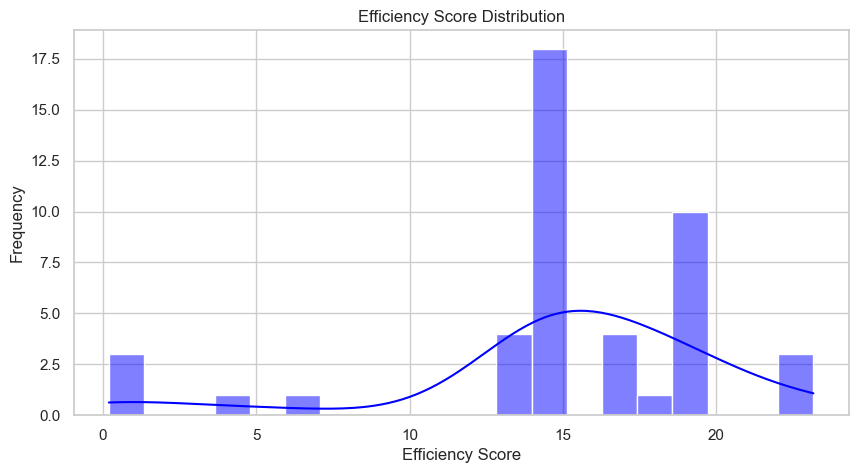

In [4]:
# Plot efficiency score distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['efficiency_score'], bins=20, kde=True, color='blue')
plt.title("Efficiency Score Distribution")
plt.xlabel("Efficiency Score")
plt.ylabel("Frequency")
plt.show()

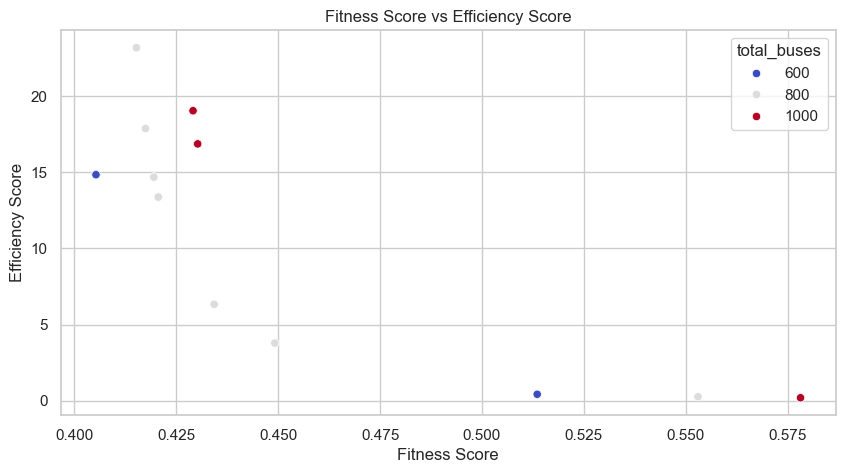

In [5]:
# Scatter plot: Fitness Score vs. Efficiency Score
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['fitness_score'], y=df['efficiency_score'], hue=df['total_buses'], palette='coolwarm')
plt.title("Fitness Score vs Efficiency Score")
plt.xlabel("Fitness Score")
plt.ylabel("Efficiency Score")
plt.show()

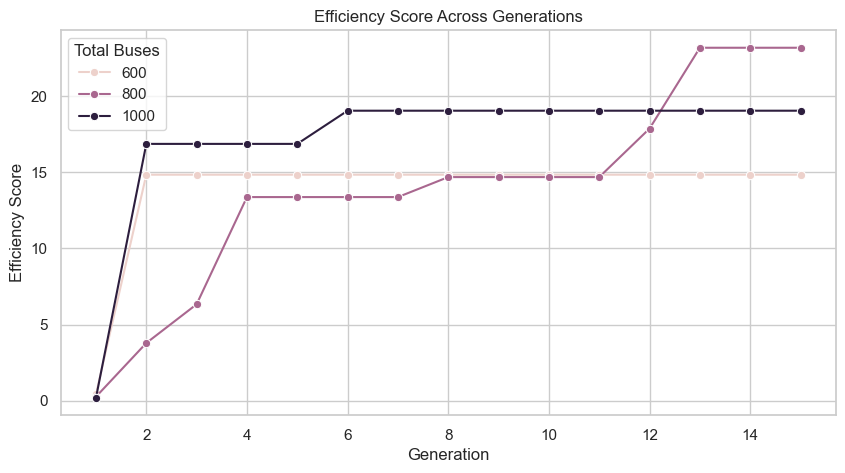

In [6]:
# Line plot: Efficiency over Generations
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="generation", y="efficiency_score", hue="total_buses", marker="o")
plt.title("Efficiency Score Across Generations")
plt.xlabel("Generation")
plt.ylabel("Efficiency Score")
plt.legend(title="Total Buses")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_35336\1180815331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['total_buses'], y=df['bus_utilization'], palette='Set2')


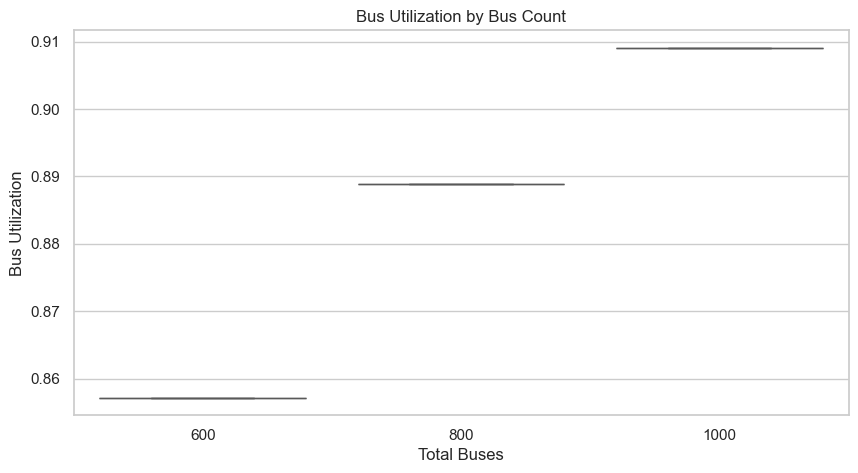

In [7]:
# Box plot: Bus Utilization by Total Buses
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['total_buses'], y=df['bus_utilization'], palette='Set2')
plt.title("Bus Utilization by Bus Count")
plt.xlabel("Total Buses")
plt.ylabel("Bus Utilization")
plt.show()

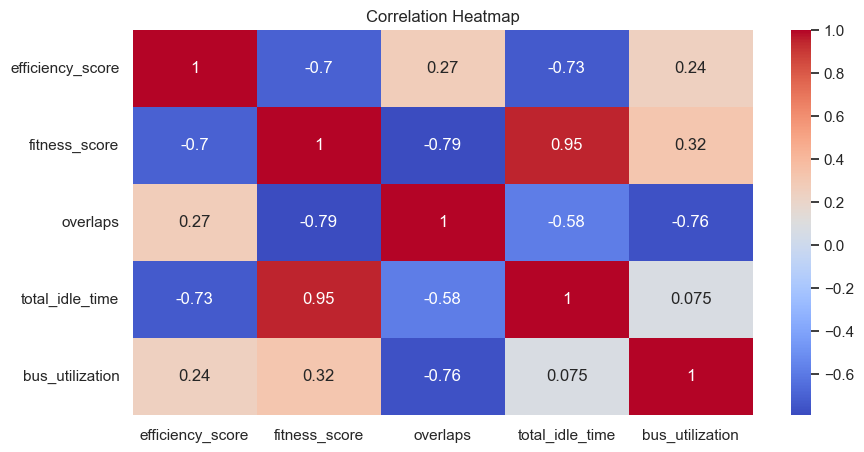

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df[['efficiency_score', 'fitness_score', 'overlaps', 'total_idle_time', 'bus_utilization']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()